# Q1

The update rule has been derived used to tain a 2-layer neural network. One hidden layer with 2 neurons and one output layer with one neuron for regression using Mean Square Error loss.

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# define necessary functions for the neural network
# functions for predictions for model accuracy
def mserror(pred_y, y):
    return ((pred_y - y) ** 2).sum() / (pred_y.size)
    
def accuracy(pred_y, y_true):
    y_bar = np.sum(y_true)/len(y_true)
    ssreg = np.sum((y_true - pred_y) ** 2)
    sstot = np.sum((y_true - y_bar) ** 2)
    acc = 1 - (ssreg / sstot)
    return acc

# set up the activation functions and derivatives for the neural network
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def linear(x):
    return x

def linear_derivative(x):
    return 1

def relu(x):
    return (np.maximum(0,x))

def relu_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def tanh_derivative(x):
    return 1 - (tanh(x)) ** 2
    
def Activation(x):
    if function == 'Sigmoid':
        return sigmoid(x)
    elif function == 'Linear':
        return linear(x)
    elif function == 'ReLU':
        return relu(x)
    elif function == 'Tanh':
        return tanh(x)

def deriv_Activation(x):
    if function == 'Sigmoid':
        return sigmoid_derivative(x)
    elif function == 'Linear':
        return linear_derivative(x)
    elif function == 'ReLU':
        return relu_derivative(x)
    elif function == 'Tanh':
        return tanh_derivative(x)

def backprop(W1, W2, b1, b2):
    # feedforward propagation for the first initialization values
    samples = y_train.size
    
    # hidden layer
    Z1 = np.dot(W1, x_train.T) + b1
    A1 = Activation(Z1)
    # output layer
    Z2 = np.dot(W2, A1) + b2
    A2 = linear(Z2) # output of the neural network

    for i in range(iter):
        # backpropagation
        # gradient computation
        dZ2 = A2 - y_train.T
        dW2 = np.dot(dZ2, A1.T)
        db2 = np.sum(dZ2, axis=1) * (1/samples)
        dZ1 = np.dot(W2.T, dZ2) * deriv_Activation(Z1)
        dW1 = np.dot(dZ1, x_train)
        db1 = np.sum(dZ1) * (1/samples)

        # updating weights
        W1 = W1 - dW1 * lr
        W2 = W2 - dW2 * lr
        b1 = b1 - db1 * lr
        b2 = b2 - db2 * lr

        Z1 = np.dot(W1, x_train.T) + b1
        A1 = Activation(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = linear(Z2)
        
        mse = mserror(A2.T, y_train)
        resultsmse.append(mse)

        acc = accuracy(A2.T, y_train)
        resultsacc.append(acc)
        
    return W1, W2, b1, b2, A2, resultsmse, resultsacc

This is different from the update rule for the network trained for binary classification because the output neuron has different activation function. Since the output value is for a regression, we would use a linear activation function or a ReLU activation depending on the kind of result we need. For the binary classification, we need to classify based on one of 2 classes. In the regression, we are predicting a continuous quantity.

# Q2

In [108]:
# load in the datasets
x_train = np.loadtxt("Data/X_train.csv")
y_train = np.loadtxt("Data/Y_train.csv")
x_test = np.loadtxt("Data/X_test.csv")
y_test = np.loadtxt("Data/Y_test.csv")
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [109]:
# create a new dataframe to hold the mse and accuracy values
resultsmse = []
resultsacc = []

# enter the parameters and implement the neural network
lr = 0.01
iter = 1000
neurons = 2
function = 'Sigmoid'

# set up random weights for the hidden and output layers
# initializing weight and bias for the hidden layer since we have 2 neurons there
W1 = np.random.rand(neurons, x_train.shape[1])
b1 = np.random.rand(neurons, 1)

# initializing weight for the output layer
W2 = np.random.rand(1, neurons)
b2 = np.random.rand(1, 1)

# weights after the backpropagation
W1, W2, b1, b2, A2, resultsmse, resultsacc = backprop(W1, W2, b1, b2)

The model reaches conversion and the model brings out the final updated weights, the biases, the mean square error loss and the accuracy for the neural network.

1. The activation function that I would choose for the output layer is a linear function. Since the prediction is an estimate, I will use a linear function for the output layer. Since I cannot be sure whether we would ever want to make a prediction, I cannot use ReLU so I would use a Linear activation function so the actual value is returned.

2. There should be only one neuron in the output layer. This is because the final value is a linear estimate prediction. Since it is just one prediction we are looking for, it has to be one output neuron.

3. Report the average MSE loss and the accuracy

In [110]:
print('The average MSE loss of the training model is {0}'.format(resultsmse[-1]))
print('The accuracy of the training model is {0}'.format(resultsacc[-1]))

The average MSE loss of the training model is 1186.9349604553465
The accuracy of the training model is 0.7900054615088574


4. Plot the average MSE loss and the accuracy as a function of the number of iterations

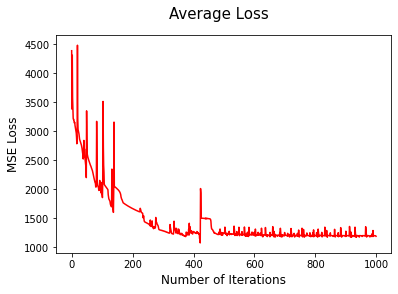

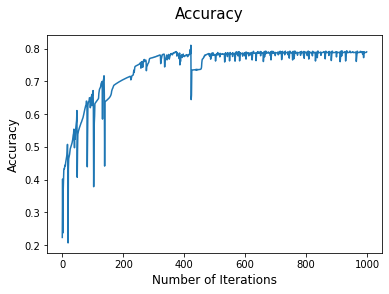

In [111]:
plt.plot(resultsmse, 'red')
plt.ylabel('MSE Loss', fontsize=12)
plt.xlabel('Number of Iterations', fontsize=12)
plt.suptitle('Average Loss', fontsize=15)
plt.show()

plt.plot(resultsacc)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Number of Iterations', fontsize=12)
plt.suptitle('Accuracy', fontsize=15)
plt.show()

5. The learning rate controls how quickly the model is adapted to the problem. The larger the learning rate the larger the skips in the model and hence the model might never converge. On the other hand, a way smaller learning rate would take a very very very long time for th emodel to approach the global minima.

In [138]:
# create a new dataframe to hold the mse and accuracy values
function = 'Sigmoid'

def backprop1(W1, W2, b1, b2, lr):
    # feedforward propagation for the first initialization values
    samples = y_train.size
    # hidden layer
    Z1 = np.dot(W1, x_train.T) + b1
    A1 = Activation(Z1)
    # output layer
    Z2 = np.dot(W2, A1) + b2
    A2 = linear(Z2) # output of the neural network
    lst = []
    lst = A2.T

    for i in range(iter):
        # backpropagation
        # gradient computation
        dZ2 = A2 - y_train.T
        dW2 = np.dot(dZ2, A1.T)
        db2 = np.sum(dZ2, axis=1) * (1/samples)
        dZ1 = np.dot(W2.T, dZ2) * deriv_Activation(Z1)
        dW1 = np.dot(dZ1, x_train)
        db1 = np.sum(dZ1) * (1/samples)

        # updating weights
        W1 = W1 - dW1 * lr
        W2 = W2 - dW2 * lr
        b1 = b1 - db1 * lr
        b2 = b2 - db2 * lr

        Z1 = np.dot(W1, x_train.T) + b1
        A1 = Activation(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = linear(Z2)
        
        lst = np.hstack((lst, A2.T))

    Temp= np.ones((lst.shape))
    Temp= y_train*Temp
    Mean_Square_Error = mserror(Temp, lst)
    Accur = accuracy(Temp, lst)

    return W1, W2, b1, b2, A2, Mean_Square_Error, Accur

# enter the parameters and implement the neural network
lr = [0.001, 0.003, 0.005, 0.008, 0.01, 0.015, 0.05, 0.1, 1]
iter = 1000
neurons = 2
tempMSE = []
tempACC = []

for i in lr:
    # set up random weights for the hidden and output layers
    # initializing weight and bias for the hidden layer since we have 2 neurons there
    np.random.seed(10)
    W1 = np.random.rand(neurons, x_train.shape[1])
    b1 = np.random.rand(neurons, 1)

    # initializing weight for the output layer
    W2 = np.random.rand(1, neurons)
    b2 = np.random.rand(1, 1)
    
    W1, W2, b1, b2, A2, Mean_Square_Error, Accur = backprop1(W1, W2, b1, b2, i)
    tempMSE.append(Mean_Square_Error)
    tempACC.append(Accur)

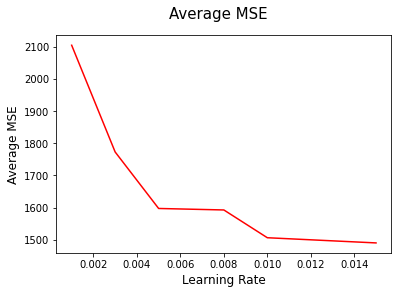

In [141]:
# Visualizing the change in average log loss with learning rate
plt.plot(lr, tempMSE,'r')
plt.ylabel('Average MSE', fontsize=12)
plt.xlabel('Learning Rate', fontsize=12)
plt.suptitle('Average MSE', fontsize=15)
plt.show()

The effect of the learning rate on the training  process is quite something else. Increasing the learning rate reduced the Mean Square Loss making the model more accurate. However, after a certain degree which after diffrerent iterations I tried, I realized that the model eneded up not converging. After a learning rate of about 0.15, the MSE started exploding to wilder proportions . Until I believe it got to infinity since the value that came out was nan. I tried smaller values below 0.02 and for all teh values till then the MSE loss was reducing. It could be another effect of the 1000 iterations I used but I did not look into diffrent variations of that.

6. To do this we modelled the original sequence iterating through neurons 1 to 10.

In [161]:
# create a new dataframe to hold the mse and accuracy values
function = 'Sigmoid'

def backprop2(W1, W2, b1, b2):
    # feedforward propagation for the first initialization values
    samples = y_train.size
    # hidden layer
    Z1 = np.dot(W1, x_train.T) + b1
    A1 = Activation(Z1)
    # output layer
    Z2 = np.dot(W2, A1) + b2
    A2 = linear(Z2) # output of the neural network
    lst = []
    lst = A2.T

    for i in range(iter):
        # backpropagation
        # gradient computation
        dZ2 = A2 - y_train.T
        dW2 = np.dot(dZ2, A1.T)
        db2 = np.sum(dZ2, axis=1) * (1/samples)
        dZ1 = np.dot(W2.T, dZ2) * deriv_Activation(Z1)
        dW1 = np.dot(dZ1, x_train)
        db1 = np.sum(dZ1) * (1/samples)

        # updating weights
        W1 = W1 - dW1 * lr
        W2 = W2 - dW2 * lr
        b1 = b1 - db1 * lr
        b2 = b2 - db2 * lr

        Z1 = np.dot(W1, x_train.T) + b1
        A1 = Activation(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = linear(Z2)
        
        lst = np.hstack((lst, A2.T))

    Temp= np.ones((lst.shape))
    Temp= y_train*Temp
    Mean_Square_Error = mserror(Temp, lst)
    Accur = accuracy(Temp, lst)

    return W1, W2, b1, b2, A2, Mean_Square_Error, Accur

# enter the parameters and implement the neural network
lr = 0.01
iter = 1000
neurons = 11
tempMSE = []
tempACC = []

for i in range(1, neurons):
    # set up random weights for the hidden and output layers
    # initializing weight and bias for the hidden layer since we have 2 neurons there
    np.random.seed(10)
    W1 = np.random.rand(i, x_train.shape[1])
    b1 = np.random.rand(i, 1)

    # initializing weight for the output layer
    W2 = np.random.rand(1, i)
    b2 = np.random.rand(1, 1)
    
    W1, W2, b1, b2, A2, Mean_Square_Error, Accur = backprop2(W1, W2, b1, b2)
    tempMSE.append(Mean_Square_Error)
    tempACC.append(Accur)

Xaxis= np.arange(1,len(tempMSE)+1,1)

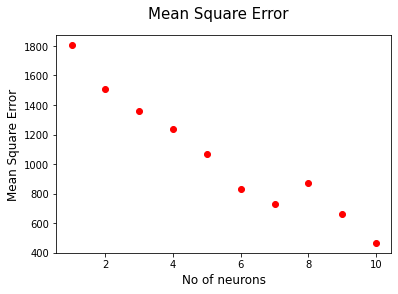

In [169]:
# Visualizing the change in Mean Square Error with number of neurons
plt.plot(Xaxis,tempMSE, 'ro')
plt.ylabel('Mean Square Error', fontsize=12)
plt.xlabel('No of neurons', fontsize=12)
plt.suptitle('Mean Square Error', fontsize=15)
plt.show()

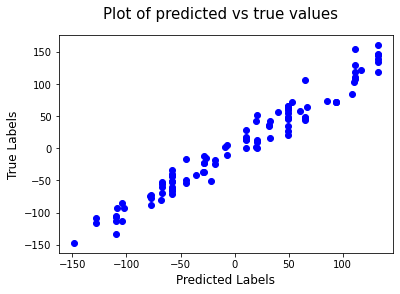

In [170]:
# Visualizing the true labels against the predicted labels for the final neuron iteration
plt.plot(A2.T, y_train, 'bo')
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.suptitle('Plot of predicted vs true values', fontsize=15)
plt.show()

a. The update rule does not need to be changed or derived again since the number of neurons does not affect the activation function and the derivation of it in the neural network. The only thing that changes is that the number of neurons using that activation function change. Everything else reamins the same.

b. From the chart showing the changing neurons, it is evident that for the model, increasing the neurons in the model reduces the error in the model. I believe this exists because the increase in the neurons helps to create more features for the data hence helping the model to model more variability in the data leading to lower Mean Square Error.

7. Exploring 2 different activation functions, tanh

In [9]:
# Tanh activation function
# create a new dataframe to hold the mse and accuracy values
resultsmse = []
resultsacc = []

# enter the parameters and implement the neural network
lr = 0.01
iter = 1000
neurons = 2
function = 'Tanh'

# set up random weights for the hidden and output layers
# initializing weight and bias for the hidden layer since we have 2 neurons there
W1 = np.random.rand(neurons, x_train.shape[1])
b1 = np.random.rand(neurons, 1)

# initializing weight for the output layer
W2 = np.random.rand(1, neurons)
b2 = np.random.rand(1, 1)

# weights after the backpropagation
tanhW1, tanhW2, tanhb1, tanhb2, tanhA2, tanhresultsmse, tanhresultsacc = backprop(W1, W2, b1, b2)

In [10]:
# Linear activation function
# create a new dataframe to hold the mse and accuracy values
resultsmse = []
resultsacc = []

# enter the parameters and implement the neural network
lr = 0.01
iter = 1000
neurons = 2
function = 'Linear'

# set up random weights for the hidden and output layers
# initializing weight and bias for the hidden layer since we have 2 neurons there
W1 = np.random.rand(neurons, x_train.shape[1])
b1 = np.random.rand(neurons, 1)

# initializing weight for the output layer
W2 = np.random.rand(1, neurons)
b2 = np.random.rand(1, 1)

# weights after the backpropagation
linW1, linW2, linb1, linb2, linA2, linresultsmse, linresultsacc = backprop(W1, W2, b1, b2)

a. Yes, I would need to change the update rule because since we are changing the activation function, the derivative will also change.

b. The change we will need to achieve this is to change teh function for the activation function and change the derivative in the update rule equations.

c. Report the observations by reporting the final loss and plotting the true labels against predicted labels.

In [11]:
print('The average MSE loss of the tanh training model is {0}'.format(tanhresultsmse[-1]))
print('The average MSE loss of the linear training model is {0}'.format(linresultsmse[-1]))

The average MSE loss of the tanh training model is 1345.598318089821
The average MSE loss of the linear training model is nan


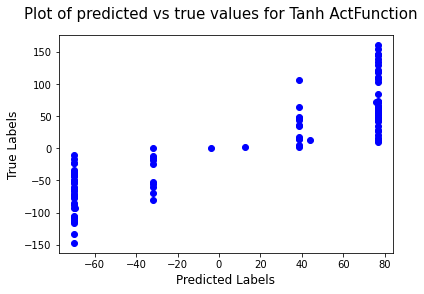

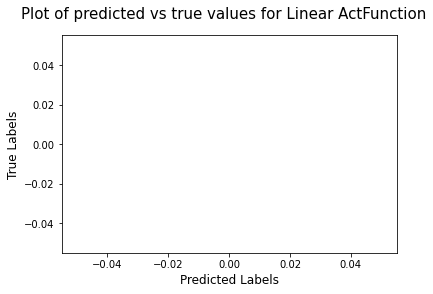

In [171]:
plt.plot(tanhA2.T, y_train, 'bo')
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.suptitle('Plot of predicted vs true values for Tanh ActFunction', fontsize=15)
plt.show()

plt.plot(linA2.T, y_train, 'bo')
plt.ylabel('True Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)
plt.suptitle('Plot of predicted vs true values for Linear ActFunction', fontsize=15)
plt.show()

The tested activation functions were sigmoid, tanh and linear functions. The sigmoid and the tanh worked on the modelling the data with good mean square error loss. On the other hand, the linear function performed very poorly and the results were bad. I believe since the linear function did not have limits for the activation function, what probably happened was an exploding gradient problem. The computational error obtained could also be that linear model could not properly capture the non-linearity in the model.